In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [3]:
import os
from dotenv import load_dotenv

# Carrega as variáveis de ambiente do arquivo .env
load_dotenv(dotenv_path="../.env_dev")

True

In [4]:
def create_conn():
    # Defina os parâmetros de conexão
    db_user = os.getenv('DB_USER')
    db_password = os.getenv('DB_PASSWORD')
    db_host = os.getenv('DB_HOST')
    db_port = '5432'
    db_name = 'magic-steps'

    # Crie a URL de conexão
    connection_url = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

    # Crie um engine do SQLAlchemy
    engine = create_engine(connection_url)
    return engine
engine = create_conn()

In [11]:
# Query para listar todas as tabelas
query = """
SELECT *
FROM magic_steps.vw_aluno limit 11000
"""

df = pd.read_sql_query(query, engine)
df.head()

,IdAluno,IdUnidade,Sexo,EstadoCivil,DataNascimento,CorRaca,EnsinoMedio_IdEstabelecimentoEnsino,EnsinoMedio_AnoConclusao,IdTurma,IdSituacaoAlunoTurma,...,IdMotivoInativacao,ComentarioInativacao,IdPlanoPagamento_Matricula,MotivoInativacao,SituacaoAlunoTurma,idade,DataOcorrencia,ObservacaoRegistro,IdTipoOcorrencia,NomeTipoOcorrencia
0,145,1.0,M,5.0,2005-11-26 02:00:00,B,None,None,303,9,...,NaN,,9.0,None,Troca de Fase *Anual,18.0,2021-08-18 00:00:00,"Aluno foi transferido da Turma 4A para a 4F, p...",12,*Mudança de Turma*
1,145,1.0,M,5.0,2005-11-26 02:00:00,B,None,None,226,9,...,NaN,,NaN,None,Troca de Fase *Anual,18.0,2021-08-18 00:00:00,"Aluno foi transferido da Turma 4A para a 4F, p...",12,*Mudança de Turma*
2,145,1.0,M,5.0,2005-11-26 02:00:00,B,None,None,222,9,...,NaN,,NaN,None,Troca de Fase *Anual,18.0,2021-08-18 00:00:00,"Aluno foi transferido da Turma 4A para a 4F, p...",12,*Mudança de Turma*
3,145,1.0,M,5.0,2005-11-26 02:00:00,B,None,None,202,9,...,NaN,,9.0,None,Troca de Fase *Anual,18.0,2021-08-18 00:00:00,"Aluno foi transferido da Turma 4A para a 4F, p...",12,*Mudança de Turma*
4,145,1.0,M,5.0,2005-11-26 02:00:00,B,None,None,105,9,...,NaN,,8.0,None,Troca de Fase *Anual,18.0,2021-08-18 00:00:00,"Aluno foi transferido da Turma 4A para a 4F, p...",12,*Mudança de Turma*


In [12]:
# Extrair uma amostra de 10.000 registros
df_sample = df.sample(n=10000, random_state=42)

# Salvar a amostra em um novo arquivo CSV
df_sample.to_csv('./dados_amostra.csv', index=False)

In [13]:
# Mostrar as primeiras linhas do DataFrame e verificar informações básicas
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   IdAluno                              11000 non-null  int64  
 1   IdUnidade                            11000 non-null  float64
 2   Sexo                                 11000 non-null  object 
 3   EstadoCivil                          11000 non-null  float64
 4   DataNascimento                       11000 non-null  object 
 5   CorRaca                              11000 non-null  object 
 6   EnsinoMedio_IdEstabelecimentoEnsino  0 non-null      object 
 7   EnsinoMedio_AnoConclusao             0 non-null      object 
 8   IdTurma                              11000 non-null  int64  
 9   IdSituacaoAlunoTurma                 11000 non-null  int64  
 10  DataSituacaoAtivo                    11000 non-null  object 
 11  DataSituacaoInativo         

(None,
    IdAluno  IdUnidade Sexo  EstadoCivil       DataNascimento CorRaca  \
 0      145        1.0    M          5.0  2005-11-26 02:00:00       B   
 1      145        1.0    M          5.0  2005-11-26 02:00:00       B   
 2      145        1.0    M          5.0  2005-11-26 02:00:00       B   
 3      145        1.0    M          5.0  2005-11-26 02:00:00       B   
 4      145        1.0    M          5.0  2005-11-26 02:00:00       B   
 
   EnsinoMedio_IdEstabelecimentoEnsino EnsinoMedio_AnoConclusao  IdTurma  \
 0                                None                     None      303   
 1                                None                     None      226   
 2                                None                     None      222   
 3                                None                     None      202   
 4                                None                     None      105   
 
    IdSituacaoAlunoTurma  ... IdMotivoInativacao ComentarioInativacao  \
 0                    

In [14]:
# Remover colunas com muitos valores nulos
cols_to_drop = [
    'EnsinoMedio_IdEstabelecimentoEnsino',
    'EnsinoMedio_AnoConclusao',
    'ComentarioInativacao'
]
df_clean = df.drop(columns=cols_to_drop)

# Converter colunas de datas para datetime
date_cols = [
    'DataNascimento', 
    'DataSituacaoAtivo', 
    'DataSituacaoInativo', 
    'DataHoraEfetivacaoMatricula', 
    'DataOcorrencia'
]

for col in date_cols:
    df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')

# Verificar dados limpos
df_clean_info = df_clean.info()
df_clean_head = df_clean.head()

df_clean_info, df_clean_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   IdAluno                      11000 non-null  int64         
 1   IdUnidade                    11000 non-null  float64       
 2   Sexo                         11000 non-null  object        
 3   EstadoCivil                  11000 non-null  float64       
 4   DataNascimento               11000 non-null  datetime64[ns]
 5   CorRaca                      11000 non-null  object        
 6   IdTurma                      11000 non-null  int64         
 7   IdSituacaoAlunoTurma         11000 non-null  int64         
 8   DataSituacaoAtivo            11000 non-null  datetime64[ns]
 9   DataSituacaoInativo          9531 non-null   datetime64[ns]
 10  DataHoraEfetivacaoMatricula  11000 non-null  datetime64[ns]
 11  ProblemaAutorizadoMatricula  11000 non-nu

(None,
    IdAluno  IdUnidade Sexo  EstadoCivil      DataNascimento CorRaca  IdTurma  \
 0      145        1.0    M          5.0 2005-11-26 02:00:00       B      303   
 1      145        1.0    M          5.0 2005-11-26 02:00:00       B      226   
 2      145        1.0    M          5.0 2005-11-26 02:00:00       B      222   
 3      145        1.0    M          5.0 2005-11-26 02:00:00       B      202   
 4      145        1.0    M          5.0 2005-11-26 02:00:00       B      105   
 
    IdSituacaoAlunoTurma DataSituacaoAtivo DataSituacaoInativo  ...  \
 0                     9        2022-01-01          2022-12-31  ...   
 1                     9        2022-01-01          2022-12-31  ...   
 2                     9        2022-01-01          2022-12-31  ...   
 3                     9        2022-01-01          2022-12-31  ...   
 4                     9        2021-01-01          2021-12-31  ...   
 
         ProblemaAutorizadoMatricula IdMotivoInativacao  \
 0  #MATRICULA_REP

In [ ]:
!pip install matplotlib seaborn

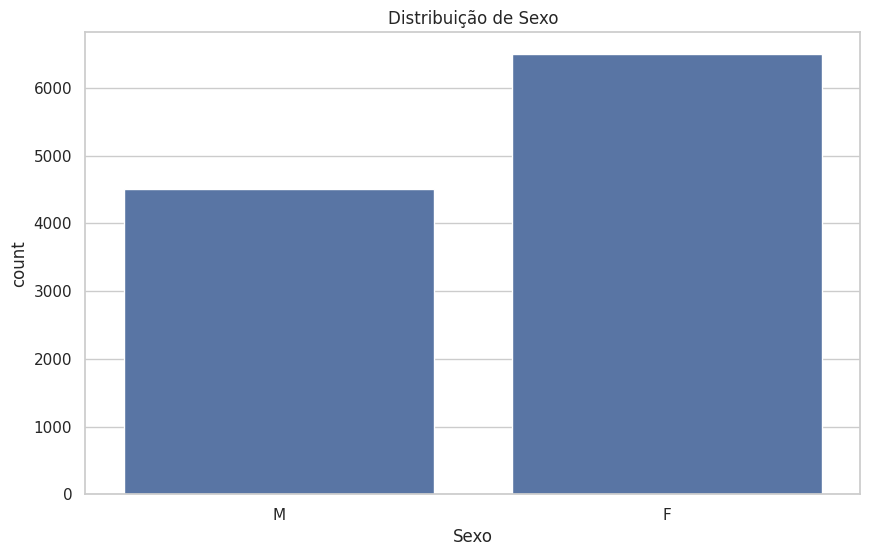

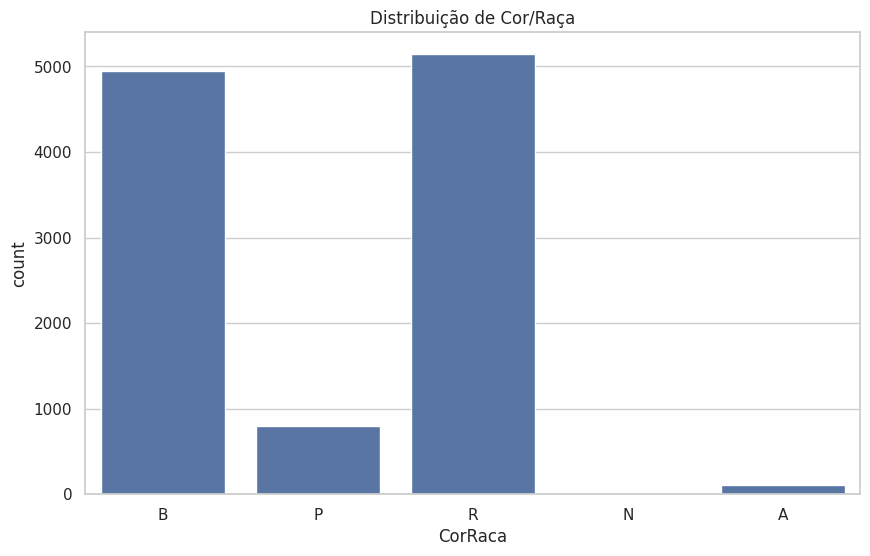

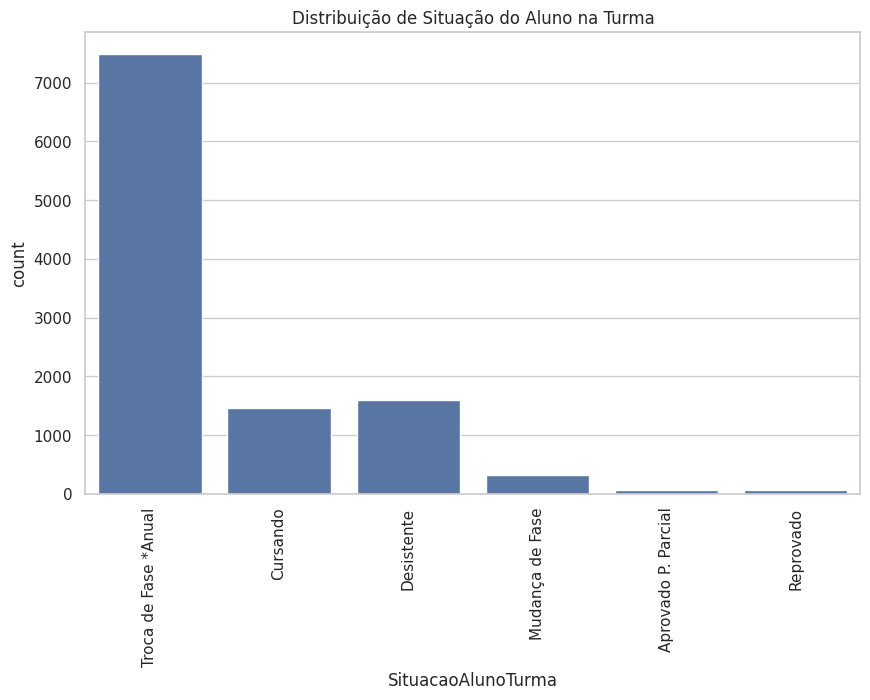

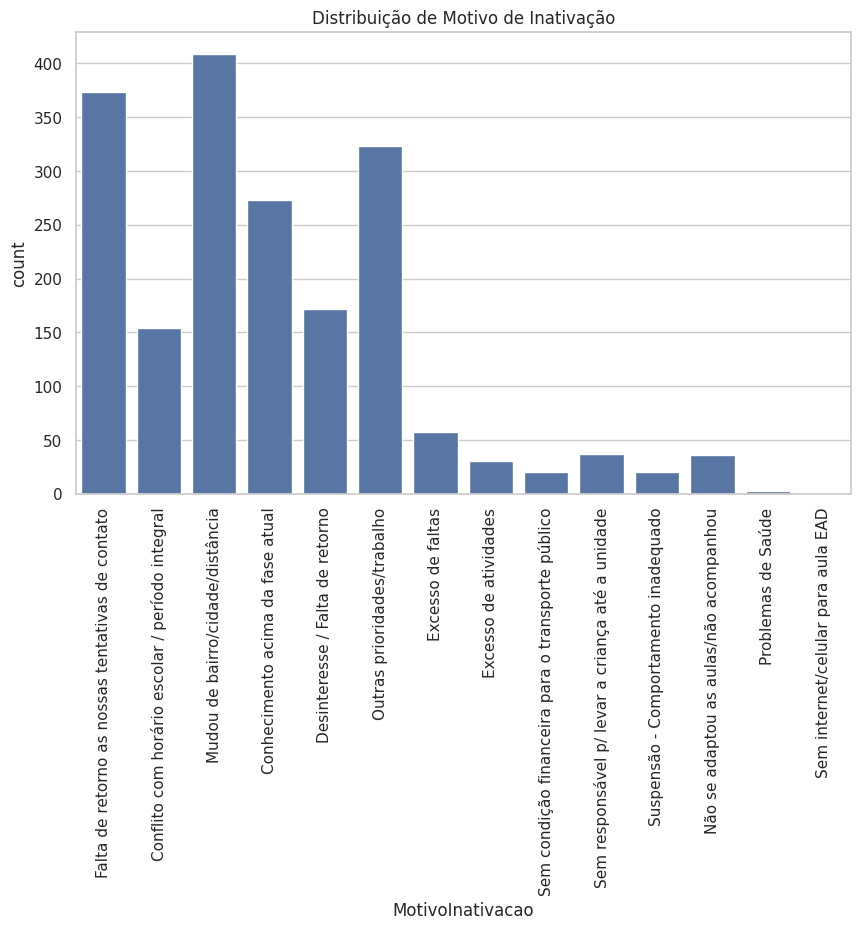

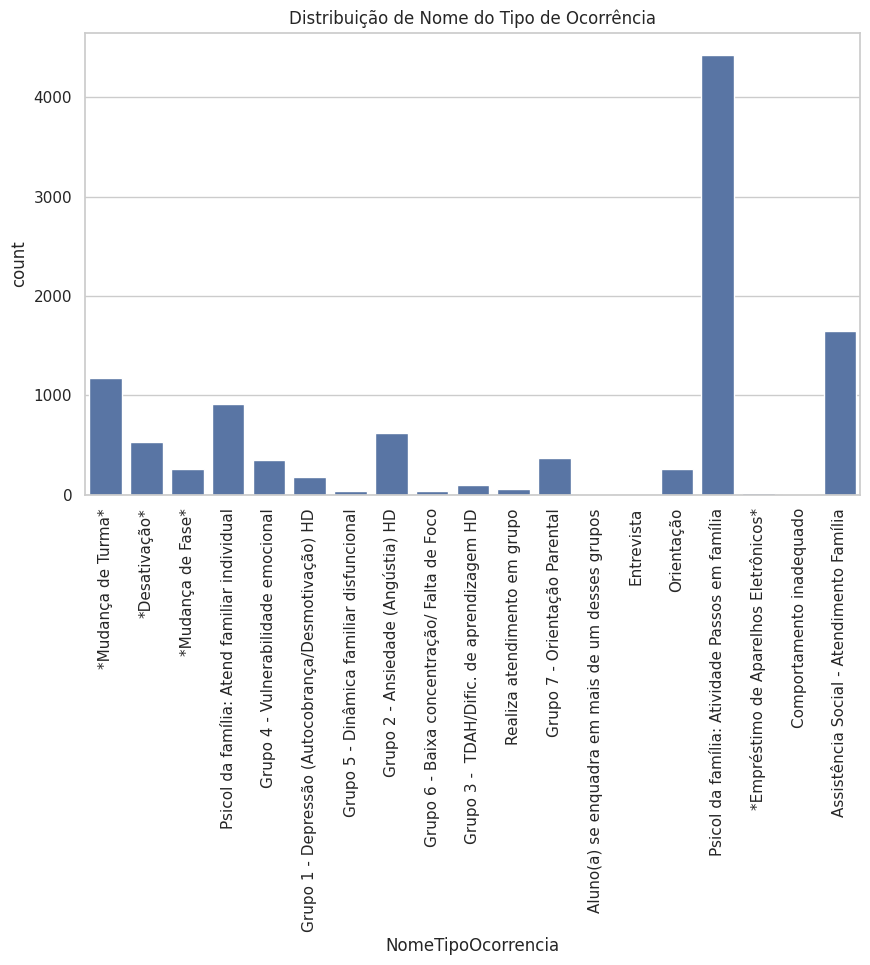

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set_theme(style="whitegrid")
sns.color_palette("tab10")


# Distribuição de Sexo
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Sexo')
plt.title('Distribuição de Sexo')
plt.show()

# Distribuição de Cor/Raça
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='CorRaca')
plt.title('Distribuição de Cor/Raça')
plt.show()

# Distribuição de Situação do Aluno na Turma
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='SituacaoAlunoTurma')
plt.title('Distribuição de Situação do Aluno na Turma')
plt.xticks(rotation=90)
plt.show()

# Distribuição de Motivo de Inativação
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='MotivoInativacao')
plt.title('Distribuição de Motivo de Inativação')
plt.xticks(rotation=90)
plt.show()

# Distribuição de Nome do Tipo de Ocorrência
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='NomeTipoOcorrencia')
plt.title('Distribuição de Nome do Tipo de Ocorrência')
plt.xticks(rotation=90)
plt.show()


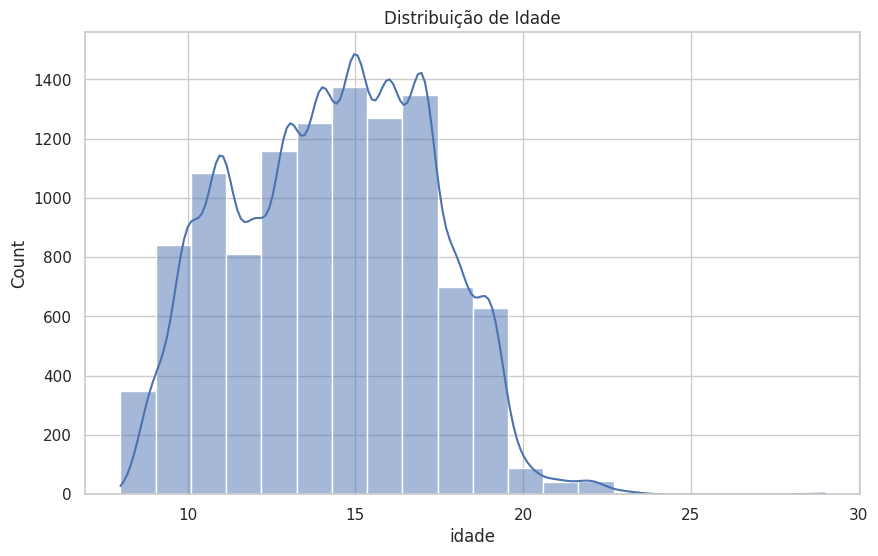

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
sns.set(style="whitegrid")

# Distribuição de Idade
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='idade', bins=20, kde=True)
plt.title('Distribuição de Idade')
plt.show()


In [25]:
df_clean

,IdAluno,IdUnidade,Sexo,EstadoCivil,DataNascimento,CorRaca,IdTurma,IdSituacaoAlunoTurma,DataSituacaoAtivo,DataSituacaoInativo,...,ProblemaAutorizadoMatricula,IdMotivoInativacao,IdPlanoPagamento_Matricula,MotivoInativacao,SituacaoAlunoTurma,idade,DataOcorrencia,ObservacaoRegistro,IdTipoOcorrencia,NomeTipoOcorrencia
0,145,1.0,M,5.0,2005-11-26 02:00:00,B,303,9,2022-01-01,2022-12-31,...,#MATRICULA_REPETIDA_MESMA_SERIE#,NaN,9.0,None,Troca de Fase *Anual,18.0,2021-08-18,"Aluno foi transferido da Turma 4A para a 4F, p...",12,*Mudança de Turma*
1,145,1.0,M,5.0,2005-11-26 02:00:00,B,226,9,2022-01-01,2022-12-31,...,,NaN,NaN,None,Troca de Fase *Anual,18.0,2021-08-18,"Aluno foi transferido da Turma 4A para a 4F, p...",12,*Mudança de Turma*
2,145,1.0,M,5.0,2005-11-26 02:00:00,B,222,9,2022-01-01,2022-12-31,...,,NaN,NaN,None,Troca de Fase *Anual,18.0,2021-08-18,"Aluno foi transferido da Turma 4A para a 4F, p...",12,*Mudança de Turma*
3,145,1.0,M,5.0,2005-11-26 02:00:00,B,202,9,2022-01-01,2022-12-31,...,,NaN,9.0,None,Troca de Fase *Anual,18.0,2021-08-18,"Aluno foi transferido da Turma 4A para a 4F, p...",12,*Mudança de Turma*
4,145,1.0,M,5.0,2005-11-26 02:00:00,B,105,9,2021-01-01,2021-12-31,...,,NaN,8.0,None,Troca de Fase *Anual,18.0,2021-08-18,"Aluno foi transferido da Turma 4A para a 4F, p...",12,*Mudança de Turma*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,274,1.0,M,5.0,2008-12-23 00:00:00,P,501,9,2023-01-01,2023-12-31,...,#ALUNO_CURSANDO_TURMA_PERIODO_ANTERIOR#,NaN,10.0,None,Troca de Fase *Anual,15.0,2022-06-18,Genitora segue em atendimento individual,33,Psicol da família: Atend familiar individual
10996,274,1.0,M,5.0,2008-12-23 00:00:00,P,456,9,2022-01-01,2022-12-31,...,#MATRICULA_REPETIDA_MESMA_SERIE#,NaN,9.0,None,Troca de Fase *Anual,15.0,2022-06-18,Genitora segue em atendimento individual,33,Psicol da família: Atend familiar individual
10997,274,1.0,M,5.0,2008-12-23 00:00:00,P,442,9,2022-01-01,2022-12-31,...,,NaN,NaN,None,Troca de Fase *Anual,15.0,2022-06-18,Genitora segue em atendimento individual,33,Psicol da família: Atend familiar individual
10998,274,1.0,M,5.0,2008-12-23 00:00:00,P,433,9,2022-01-01,2022-12-31,...,,NaN,NaN,None,Troca de Fase *Anual,15.0,2022-06-18,Genitora segue em atendimento individual,33,Psicol da família: Atend familiar individual


In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Variáveis Numéricas')
plt.show()


ValueError: could not convert string to float: 'M'

<Figure size 1200x800 with 0 Axes>

In [26]:
# Listar as colunas categóricas
categorical_cols = ['Sexo', 'CorRaca', 'SituacaoAlunoTurma', 'MotivoInativacao', 'NomeTipoOcorrencia']

# Converter colunas categóricas para numéricas
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype('category').cat.codes

# Verificar se a conversão foi bem-sucedida
df_clean[categorical_cols].head()


,Sexo,CorRaca,SituacaoAlunoTurma,MotivoInativacao,NomeTipoOcorrencia
0,1,1,5,-1,3
1,1,1,5,-1,3
2,1,1,5,-1,3
3,1,1,5,-1,3
4,1,1,5,-1,3


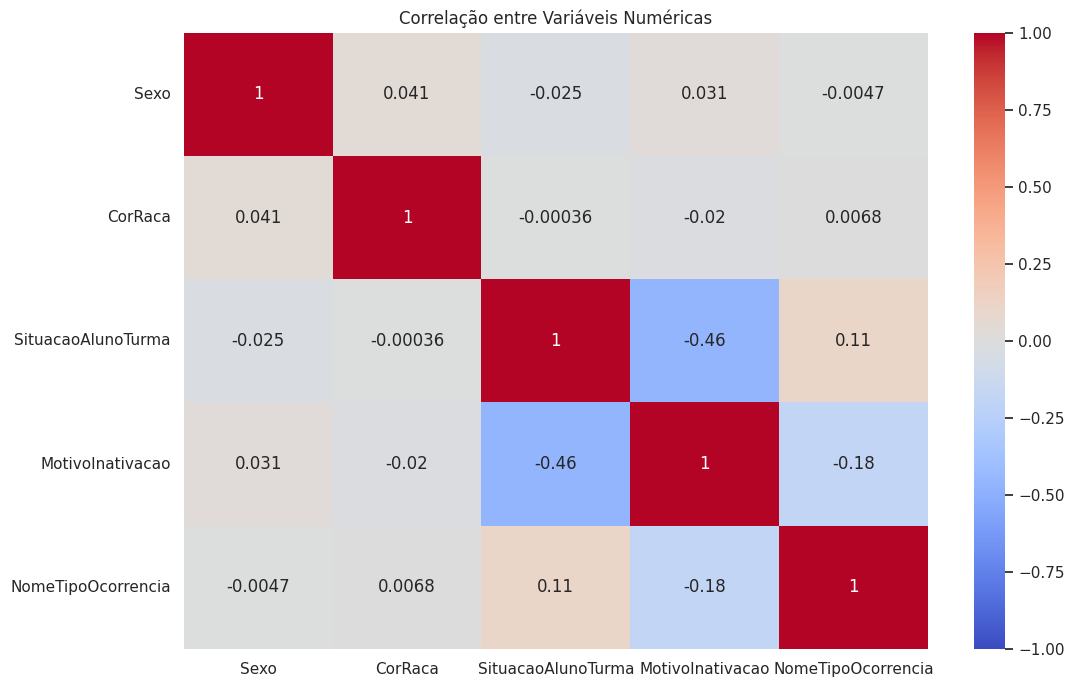

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_clean[categorical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Variáveis Numéricas')
plt.show()
